In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelBinarizer

from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import tensorflow as tf

import csv
import cv2
import matplotlib.pyplot as plt
import os

%matplotlib inline

## Read VDO

In [157]:
# labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
# labels = ['A', 'B', 'C']
# number = [0, 1, 2, 3, 4, 5, 6, 7, 8,10, 11, 12, 13, 14, 15, 16, 17, 18, 19 ,20, 21, 22, 23, 24]
# i=0
# label_count = 0
# with open(f"{'db'}.csv", "a", newline="") as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerow(["label"] + [f"pixel{i+1}" for i in range(28 * 28)])

#     for label in labels:
#         cap = cv2.VideoCapture('./image/{}_new.mp4'.format(label))
#         interval = 1000  # read one frame per 1000 milisecond
#         cap.set(cv2.CAP_PROP_POS_MSEC, interval)
#         imgs = []
#         while(cap.isOpened()):
#             ret, frame = cap.read()
#             if ret == False:
#                 break
#             cap.set(cv2.CAP_PROP_POS_MSEC, cap.get(cv2.CAP_PROP_POS_MSEC) + interval)
#             imgs.append(frame)
#             i+=1

#         imgs = np.array(imgs)
#         for img in imgs:
#             img = Image.fromarray(img)
#             img = img.convert("L")
#             img = img.resize((28, 28), resample=Image.BILINEAR)
#             width, height = img.size
#             pixels = list(img.getdata())
#             row = [number[label_count]] + pixels
#             writer.writerow(row)

#         label_count += 1
#         cap.release()
#         cv2.destroyAllWindows()

# print('number of image is ' + str(i)) 

## Import Data

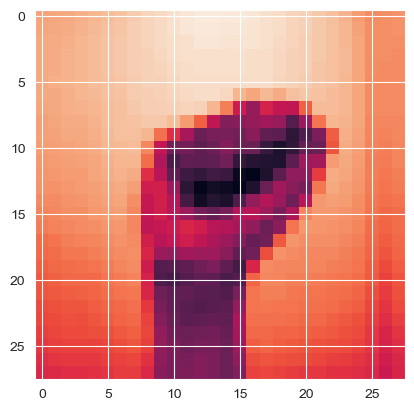

In [158]:
db_df = pd.read_csv("./db_full.csv")
del db_df['label']

label_binarizer = LabelBinarizer()
db_df = db_df.values
db_df = db_df / 255
db_df = db_df.reshape(-1,28,28,1)
plt.imshow(db_df[20])

In [159]:
db_df = pd.read_csv("./db_full.csv")

In [187]:
db_df.shape

(7977, 785)

In [160]:
train_df_org = pd.read_csv("./sign_mnist_train.csv")
test_df = pd.read_csv("./sign_mnist_test.csv")

In [161]:
train_df = pd.concat([train_df_org,db_df[1:]])

In [162]:
train_df_org.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [163]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [164]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


## Data Visualization

<AxesSubplot:xlabel='label', ylabel='count'>

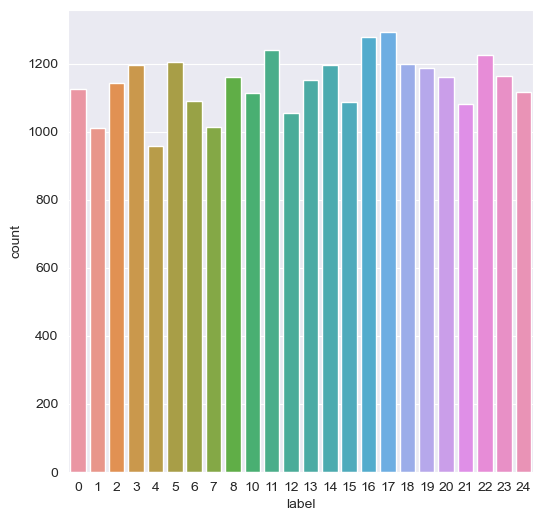

In [165]:
plt.figure(figsize = (6,6))
sns.set_style("darkgrid")
sns.countplot(x=train_df_org['label'])

<AxesSubplot:xlabel='label', ylabel='count'>

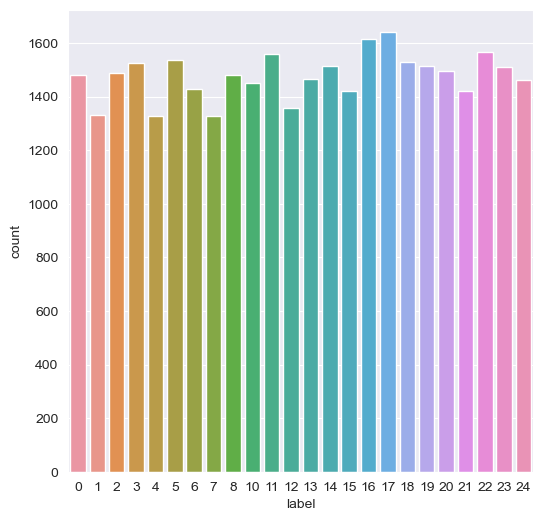

In [166]:
plt.figure(figsize = (6,6))
sns.set_style("darkgrid")
sns.countplot(x=train_df['label'])

## Prepare Data

In [167]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [168]:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

x_train = train_df.values
x_test = test_df.values

In [169]:
x_train

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [144, 145, 146, ..., 116, 110, 106],
       [144, 145, 147, ..., 116, 109, 106],
       [144, 145, 146, ..., 116, 109, 106]], dtype=int64)

In [170]:
x_train = x_train / 255
x_test = x_test / 255

In [171]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [172]:
x_train[0].shape

(28, 28, 1)

In [173]:
x_train.shape

(35431, 28, 28, 1)

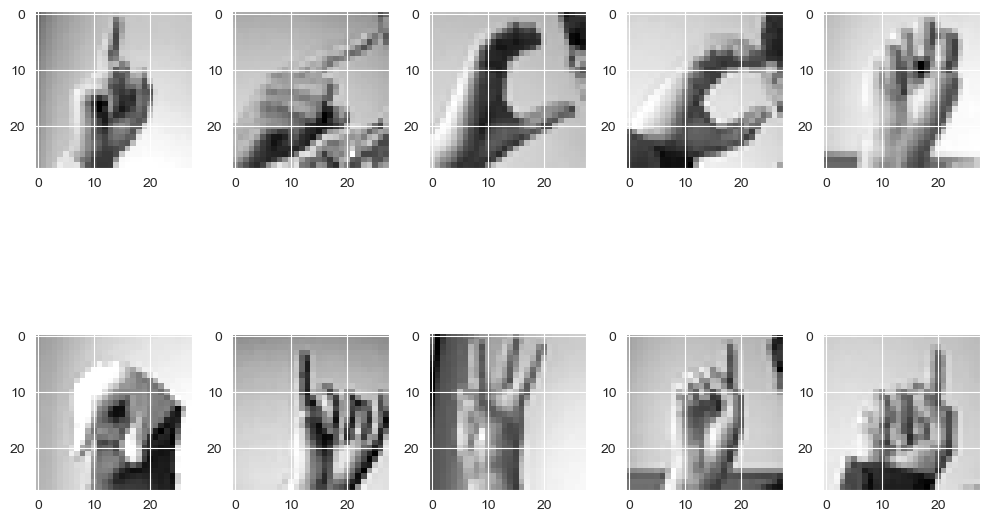

In [174]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

## Data Augmentation

In [175]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)# randomly flip images

In [176]:
datagen.fit(x_train)

In [177]:
datagenOrj = ImageDataGenerator()

In [178]:
datagenOrj.fit(x_train)

In [179]:
result_data     = datagen.flow(x_train, y_train, batch_size=128, shuffle = False)
result_data_orj = datagenOrj.flow(x_train, y_train, batch_size=128, shuffle = False)

In [180]:
def getSamplesFromDataGen(resultData):
    f, ax = plt.subplots(2,5) 
    f.set_size_inches(10, 10)
    x = resultData.next() #fetch the first batch
    a = x[0] # train data
    k = 0
    for i in range(2):
        for j in range(5):
            ax[i,j].imshow(a[k].reshape(28, 28), cmap="gray")
            k += 1
        plt.tight_layout()

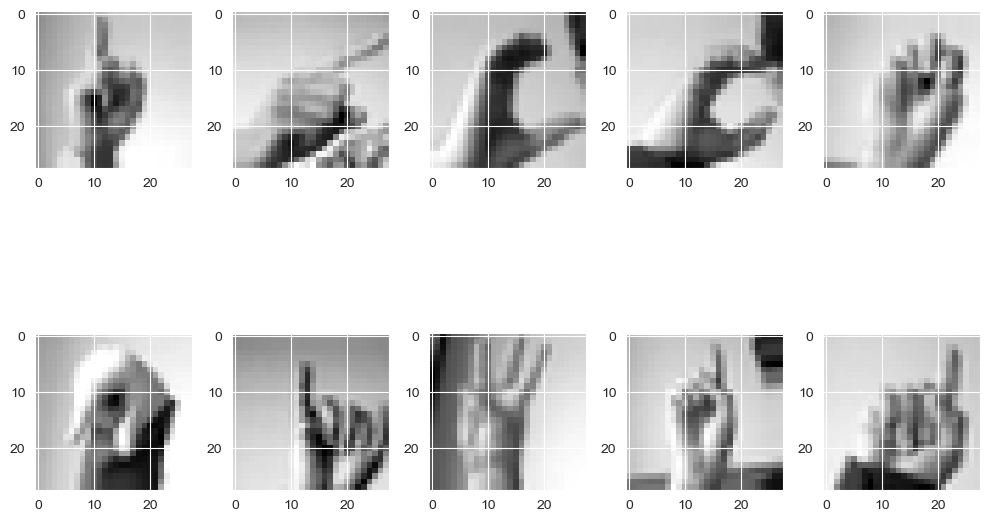

In [181]:
getSamplesFromDataGen(result_data)

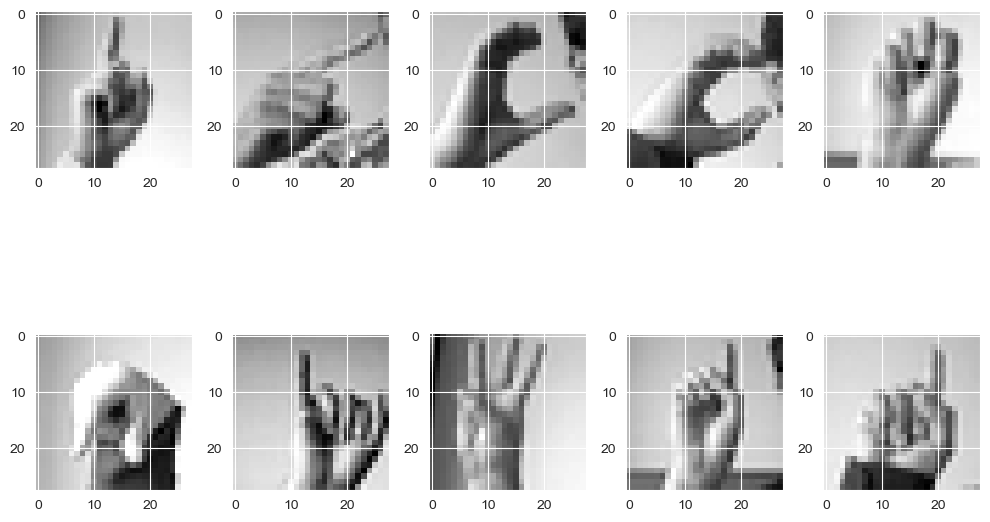

In [182]:
getSamplesFromDataGen(result_data_orj)

In [183]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(MaxPool2D((2,2) , strides = 2))
model.add(Conv2D(50 , (3,3) , strides = 1, activation = 'relu'))
model.add(Dropout(0.5))
model.add(MaxPool2D((2,2) , strides = 2))
model.add(Conv2D(25 , (3,3) , strides = 1, activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 75)        750       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 75)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 50)        33800     
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 50)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 50)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 25)         

In [184]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test))

Epoch 1/20
277/277 [==============================] - 21s 74ms/step - loss: 2.2984 - accuracy: 0.2899 - val_loss: 1.2762 - val_accuracy: 0.6725
Epoch 2/20
277/277 [==============================] - 20s 73ms/step - loss: 1.1192 - accuracy: 0.6284 - val_loss: 0.7235 - val_accuracy: 0.7867
Epoch 3/20
277/277 [==============================] - 21s 76ms/step - loss: 0.7649 - accuracy: 0.7410 - val_loss: 0.5011 - val_accuracy: 0.8703
Epoch 4/20
277/277 [==============================] - 21s 76ms/step - loss: 0.6051 - accuracy: 0.7929 - val_loss: 0.3936 - val_accuracy: 0.8904
Epoch 5/20
277/277 [==============================] - 21s 76ms/step - loss: 0.4871 - accuracy: 0.8347 - val_loss: 0.2930 - val_accuracy: 0.9279
Epoch 6/20
277/277 [==============================] - 21s 76ms/step - loss: 0.4153 - accuracy: 0.8573 - val_loss: 0.2473 - val_accuracy: 0.9474
Epoch 7/20
277/277 [==============================] - 21s 76ms/step - loss: 0.3790 - accuracy: 0.8722 - val_loss: 0.2202 - val_accuracy:

In [185]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.047424156218767166
Test accuracy: 0.9873117804527283


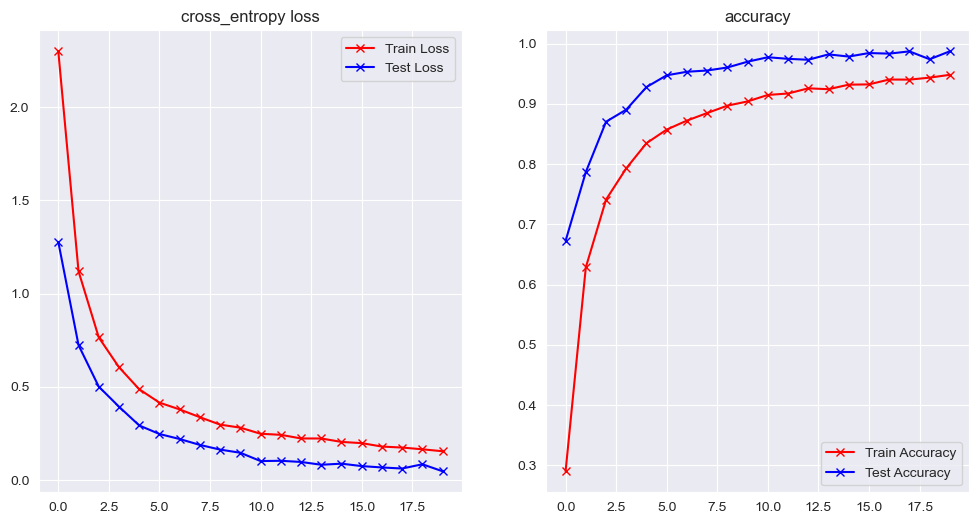

In [186]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Test Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Test Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)